# **Predictive Analysis for Accident Prevention and Response**

In [38]:
! pip install scikit-learn

# **Importing Libraries**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# **Importing CSV file as DataFrame**

In [40]:
df = pd.read_csv("FINALCoappsProject.csv")
X = df.iloc[:,1:15]
y = df.iloc[:,15]

In [41]:
print(X)

    Day_of_week Age_band_of_driver Sex_of_driver Driving_experience  \
0        Monday              18-30          Male              1-2yr   
1        Monday              31-50          Male         Above 10yr   
2        Monday              18-30          Male              1-2yr   
3        Sunday              18-30          Male             5-10yr   
4        Sunday              18-30          Male              2-5yr   
..          ...                ...           ...                ...   
519   Wednesday              18-30          Male         No Licence   
520      Friday            Over 51          Male         Above 10yr   
521      Friday              31-50          Male         Above 10yr   
522      Friday              31-50          Male             5-10yr   
523    Thursday              31-50          Male              2-5yr   

    Type_of_vehicle Area_accident_occured Types_of_Junction Road_surface_type  \
0               Car     Residential areas       No junction     As

In [42]:
print(y)

0         Low Response
1         Low Response
2         Low Response
3         Low Response
4         Low Response
            ...       
519    Medium Response
520    Medium Response
521    Medium Response
522    Medium Response
523       Low Response
Name: Safety Response, Length: 524, dtype: object


In [43]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Safety Response
0,17:02:00,Monday,18-30,Male,1-2yr,Car,Residential areas,No junction,Asphalt roads,Daylight,Normal,Roadside-parked vehicles,2,2,Slight Injury,Low Response
1,17:02:00,Monday,31-50,Male,Above 10yr,Public,Office areas,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Slight Injury,Low Response
2,17:02:00,Monday,18-30,Male,1-2yr,Lorry,Recreational areas,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Serious Injury,Low Response
3,1:06:00,Sunday,18-30,Male,5-10yr,Auto,Office areas,Y Shape,Earth roads,Street Light,Normal,Vehicle with vehicle collision,2,2,Slight Injury,Low Response
4,1:06:00,Sunday,18-30,Male,2-5yr,NaN,Industrial areas,Y Shape,Asphalt roads,Street Light,Normal,Vehicle with vehicle collision,2,2,Slight Injury,Low Response


In [44]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,524.000000,524.000000
mean,2.114504,1.717557
std,0.824029,1.123535
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,6.000000,6.000000


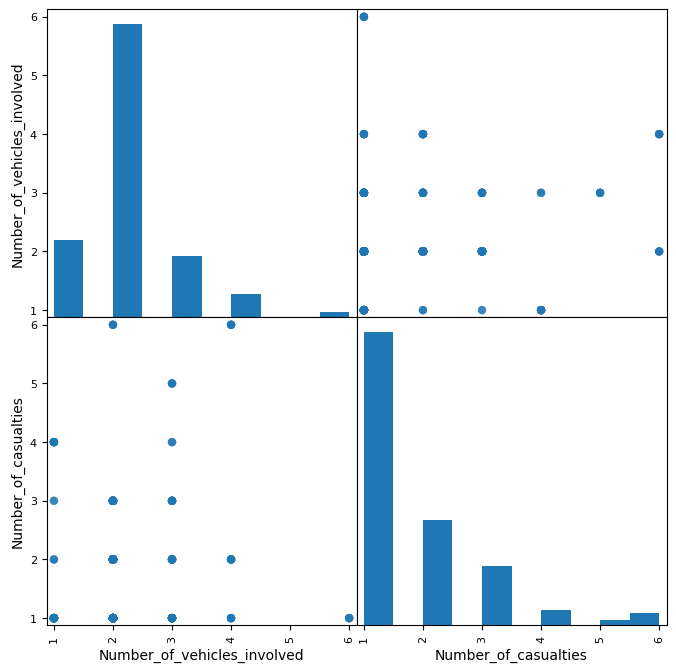

In [45]:
pd.plotting.scatter_matrix(df, figsize=(8,8), marker='o')
plt.show()

In [46]:
#We check the count of null values
df.isnull().sum()

Time                            0
Day_of_week                     0
Age_band_of_driver             29
Sex_of_driver                   0
Driving_experience             40
Type_of_vehicle                42
Area_accident_occured           0
Types_of_Junction               0
Road_surface_type               0
Light_conditions                0
Weather_conditions              0
Type_of_collision               0
Number_of_vehicles_involved     0
Number_of_casualties            0
Accident_severity               0
Safety Response                 0
dtype: int64

# **Imputing missing data**

In [47]:
from sklearn.impute import SimpleImputer
#Removing empty values or cells
imputer = SimpleImputer(strategy='most_frequent')
X_imputed1 = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#Removing 'nan' values
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_imputed2 = pd.DataFrame(imputer.fit_transform(X_imputed1), columns=X.columns)

#Updating X
X = X_imputed2
print(X['Sex_of_driver'])

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
519    Male
520    Male
521    Male
522    Male
523    Male
Name: Sex_of_driver, Length: 524, dtype: object


# **Encoding Dataset**

**First we will encode the Independent Values(X)**

In [48]:
#For columns containing binary values,  we use Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_le1 = le.fit_transform(X['Sex_of_driver'])
print(X_le1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 

In [49]:
#For columns containing non-binary values, we use OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#We drop the Sex_of_driver column since we already encoded it
X_ohe = X.drop('Sex_of_driver', axis=1)

#We separately define the columns that are to be encoded
ColumnsToEncode = ['Day_of_week','Age_band_of_driver','Driving_experience','Type_of_vehicle','Area_accident_occured','Types_of_Junction','Road_surface_type','Light_conditions','Type_of_collision','Weather_conditions','Accident_severity']

#We define the transformation
transformers = [('encoder', OneHotEncoder(), ColumnsToEncode)]
ct = ColumnTransformer(transformers=transformers, remainder='passthrough')

#We fit the transformation
X_encoded = ct.fit_transform(X_ohe)
print(X_encoded.shape)
print(type(X_encoded))
#The X_encoded is a sparse matrix in Compressed Sparse Row(CSR) format


(524, 72)
<class 'scipy.sparse._csr.csr_matrix'>


In [50]:
#Copying X_encoded to form new encoded dataframe
X = pd.DataFrame(X_encoded.toarray())

#Adding the separately encoded column Sex_of_driver to the encoded dataframe
X[X.columns[-1] + 1] = X_le1
print(X)

      0    1    2    3    4    5    6    7    8    9   ...   63   64   65  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
519  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
520  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
521  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
522  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
523  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   

      66   67   68   69   70   71  72  
0    0.0  0.0  0.0  1.0  2.0  2.0  

In [51]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


**Now we will encode the dependant variable(y)**

In [52]:
#Encoding Dependent variable
encoded_y = pd.get_dummies(y)
#Dummies converts each unique value into a column which consists on True False values

#We convert values to binary 0 or 1
y = encoded_y.astype(int)
print(y)

     High Response  Low Response  Medium Response
0                0             1                0
1                0             1                0
2                0             1                0
3                0             1                0
4                0             1                0
..             ...           ...              ...
519              0             0                1
520              0             0                1
521              0             0                1
522              0             0                1
523              0             1                0

[524 rows x 3 columns]


In [53]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


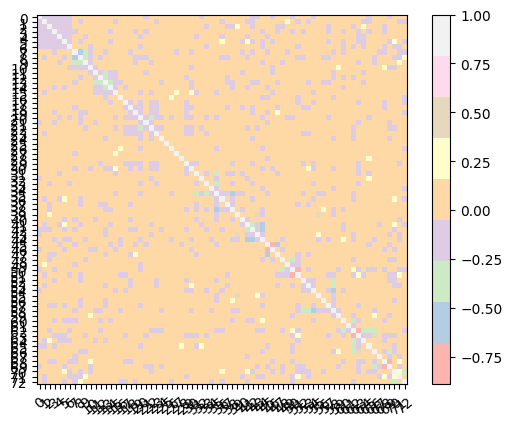

In [54]:
#We check the correlation of the values
corr = X.corr()
plt.imshow(corr, cmap="Pastel1")

plt.colorbar()

variables = []
for i in corr.columns:
    variables.append(i)

plt.xticks(range(len(corr)), variables, rotation=40)
plt.yticks(range(len(corr)), variables)

plt.show()

# **Splitting the dataset**

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

# **Model Training**

We will now train classification models and apply our training data to them

In [56]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForest_model.fit(X_train,y_train)
RandomForest_pred = RandomForest_model.predict(X_test)


In [57]:
#XGBoost
import xgboost as xgb
XGBoost_model = xgb.XGBClassifier(random_state=42)
XGBoost_model.fit(X_train,y_train)
XGBoost_pred = XGBoost_model.predict(X_test)

In [58]:
#K-Nearest Neighbors(KNN)
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)
KNN_pred = KNN_model.predict(X_test)

# **Model Evaluation**

In [59]:
#Accuracy of Random Forest Classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, RandomForest_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5047619047619047


In [60]:
#Accuracy of XGBoost
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, XGBoost_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.45714285714285713


In [61]:
#Accuracy of KNN
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, KNN_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.5142857142857142
